Landmarks shape: (510,)
Labels shape: (510,)
Unique labels: [0 1 2 3 5 7 8 9 13 14 15 16 17 18 19 20 21 22 24 25 29 31 33 36 37 39 41
 43 44 45 46 48 49 50 51 52 55 56 57 58 59 61 64 66 67 71 72 74 75 78 79
 81 82 83 84 85 88 89 90 91 93 95 97 98 99 101 102 103 104 105 107 110 112
 113 114 115 116 117 118 121 122 123 124 125 126 127 129 131 132 134 136
 138 139 140 143 144 150 153 157 158 160 162 166 167 168 169 175 176 178
 183 188 193 196 198 202 204 208 211 212 213 217 218 219 220 222 225 226
 229 232 234 235 241 242 244 245 249 250 254 255 257 258 259 265 266 267
 270 273 276 277 278 281 282 283 284 285 286 287 288 290 292 293 299 302
 307 308 311 312 313 316 318 320 323 324 325 326 328 330 332 334 339 345
 348 349 352 353 354 357 359 360 361 362 364 366 367 370 372 373 375 378
 379 380 385 389 390 392 393 396 399 400 401 403 405 406 408 409 411 414
 419 422 424 425 430 431 432 434 435 436 437 443 448 453 455 458 459 461
 464 465 466 467 473 475 482 484 487 491 493 495 496 497 498 

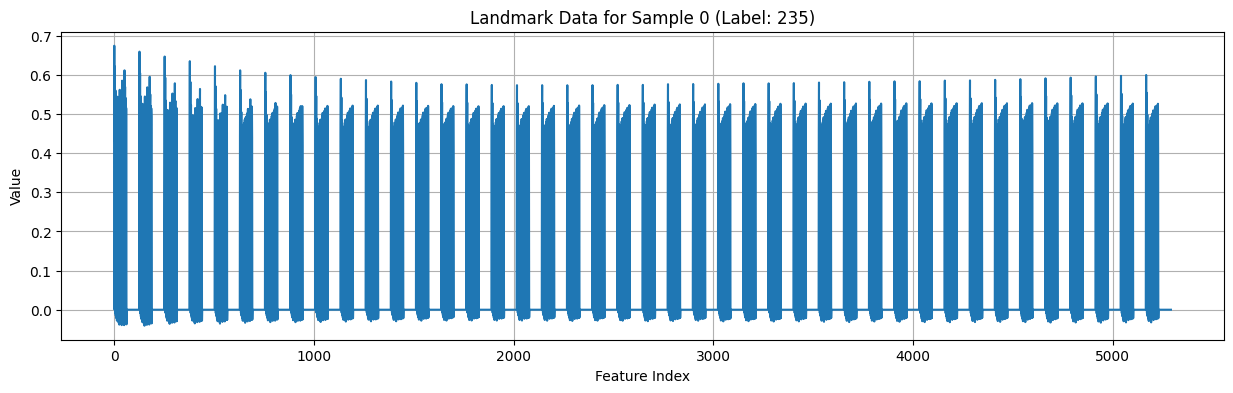

In [4]:
# Step 1: Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Define file paths
landmarks_path = 'MS_train/processed_data/landmarks_train.npy'
labels_path = 'MS_train/processed_data/labels_train.npy'

# Step 3: Check files exist
if not os.path.exists(landmarks_path) or not os.path.exists(labels_path):
    raise FileNotFoundError("One or both .npy files not found. Please check the paths.")

# Step 4: Load the saved NumPy arrays
landmarks = np.load(landmarks_path, allow_pickle=True)
labels = np.load(labels_path, allow_pickle=True)

# Step 5: Basic inspection
print(f"Landmarks shape: {landmarks.shape}")  # e.g., (160, 5292)
print(f"Labels shape: {labels.shape}")        # e.g., (160,)")
print(f"Unique labels: {np.unique(labels)}")

# Step 6: View a single sample's landmarks
sample_index = 0
sample_landmarks = landmarks[sample_index]
sample_label = labels[sample_index]

print(f"\nSample {sample_index} label: {sample_label}")
print(f"Sample {sample_index} landmark shape: {sample_landmarks.shape}")

# Step 7: Optional reshaping for better understanding (e.g., 42 frames, 21 landmarks, 3 coords)
# You might need to tweak this depending on how your data was flattened
try:
    reshaped = sample_landmarks.reshape(-1, 21, 3)
    print(f"Reshaped to (frames, landmarks, coords): {reshaped.shape}")
except ValueError:
    print("Could not reshape - landmark data may not be in expected format.")

# Step 8: Plot a flattened view of the sample
plt.figure(figsize=(15, 4))
plt.plot(sample_landmarks)
plt.title(f"Landmark Data for Sample {sample_index} (Label: {sample_label})")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()


Sample #0
Label      : 235
Hash       : 3543d890eb779afab5c323a7bc19f546
Shape      : (5292,)


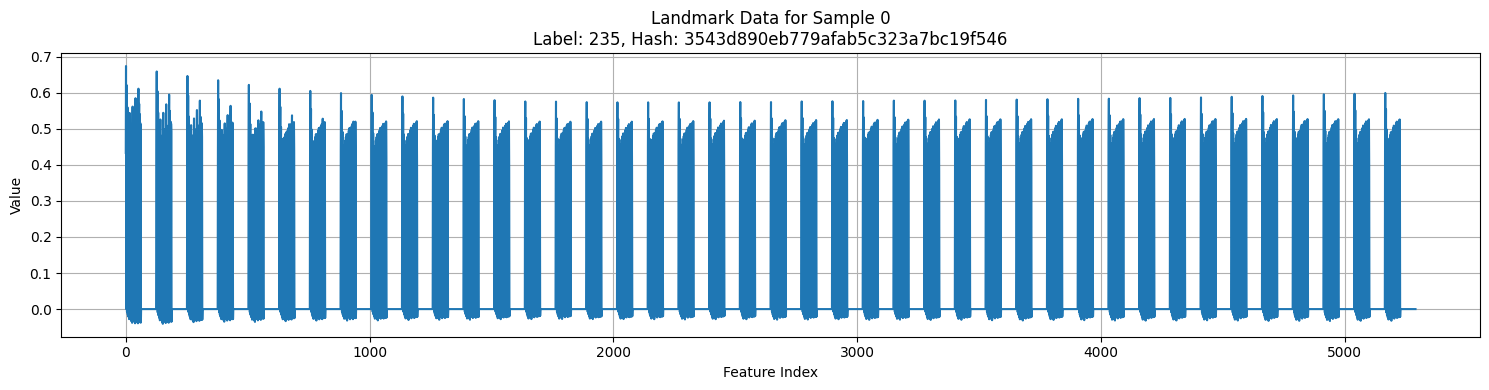

In [5]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 2: Define paths
landmarks_path = 'MS_train/processed_data/landmarks_train.npy'
labels_path = 'MS_train/processed_data/labels_train.npy'
hashes_path = 'MS_train/processed_data/landmarks_train.npy.hashes'

# Step 3: Check if all files exist
if not (os.path.exists(landmarks_path) and os.path.exists(labels_path) and os.path.exists(hashes_path)):
    raise FileNotFoundError("One or more files (landmarks, labels, hashes) are missing.")

# Step 4: Load the data
landmarks = np.load(landmarks_path, allow_pickle=True)
labels = np.load(labels_path, allow_pickle=True)

with open(hashes_path, 'r') as f:
    hashes = [line.strip() for line in f.readlines()]

# Step 5: Verify consistency
if not (len(landmarks) == len(labels) == len(hashes)):
    raise ValueError("Mismatch in number of landmarks, labels, and hashes.")

# Step 6: Inspect a sample
sample_index = 0  # change this to view other samples
sample_landmarks = landmarks[sample_index]
sample_label = labels[sample_index]
sample_hash = hashes[sample_index]

print(f"Sample #{sample_index}")
print(f"Label      : {sample_label}")
print(f"Hash       : {sample_hash}")
print(f"Shape      : {sample_landmarks.shape}")

# Step 7: Visualize landmarks as a line plot (optional)
plt.figure(figsize=(15, 4))
plt.plot(sample_landmarks)
plt.title(f"Landmark Data for Sample {sample_index}\nLabel: {sample_label}, Hash: {sample_hash}")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()
